<a href="https://colab.research.google.com/github/BragaWill/fechamento-ibovespa-python/blob/master/analise_ibov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# Author: Willian M. Braga 
# Análises diárias dos indices de fechamento Ibovespa 


import pandas as pd
import datetime

In [38]:
from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv('/content/drive/MyDrive/Ipeadata/ipeadata.csv', sep=",")
dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Data,Índice de ações - Ibovespa - fechamento - - - Bolsa de Valores- Mercadorias e Futuros (BM&FBovespa) - GM366_IBVSP366,Unnamed: 2
0,04/07/1994,3580.8,NaN
1,05/07/1994,3564.3,NaN
2,06/07/1994,3753.5,NaN
3,07/07/1994,3904.9,NaN
4,08/07/1994,4051.9,NaN
...,...,...,...
9743,07/03/2021,NaN,NaN
9744,08/03/2021,110612.0,NaN
9745,09/03/2021,111331.0,NaN
9746,10/03/2021,112776.0,NaN


In [39]:
# Preparação dos dados
dataset.columns = ['data_fato','indice_ibovespa', '?']  
dataset.drop('?', inplace=True, axis=1)  
dataset = dataset.dropna()
dataset

,data_fato,indice_ibovespa
0,04/07/1994,3580.8
1,05/07/1994,3564.3
2,06/07/1994,3753.5
3,07/07/1994,3904.9
4,08/07/1994,4051.9
...,...,...
9741,05/03/2021,115202.0
9744,08/03/2021,110612.0
9745,09/03/2021,111331.0
9746,10/03/2021,112776.0


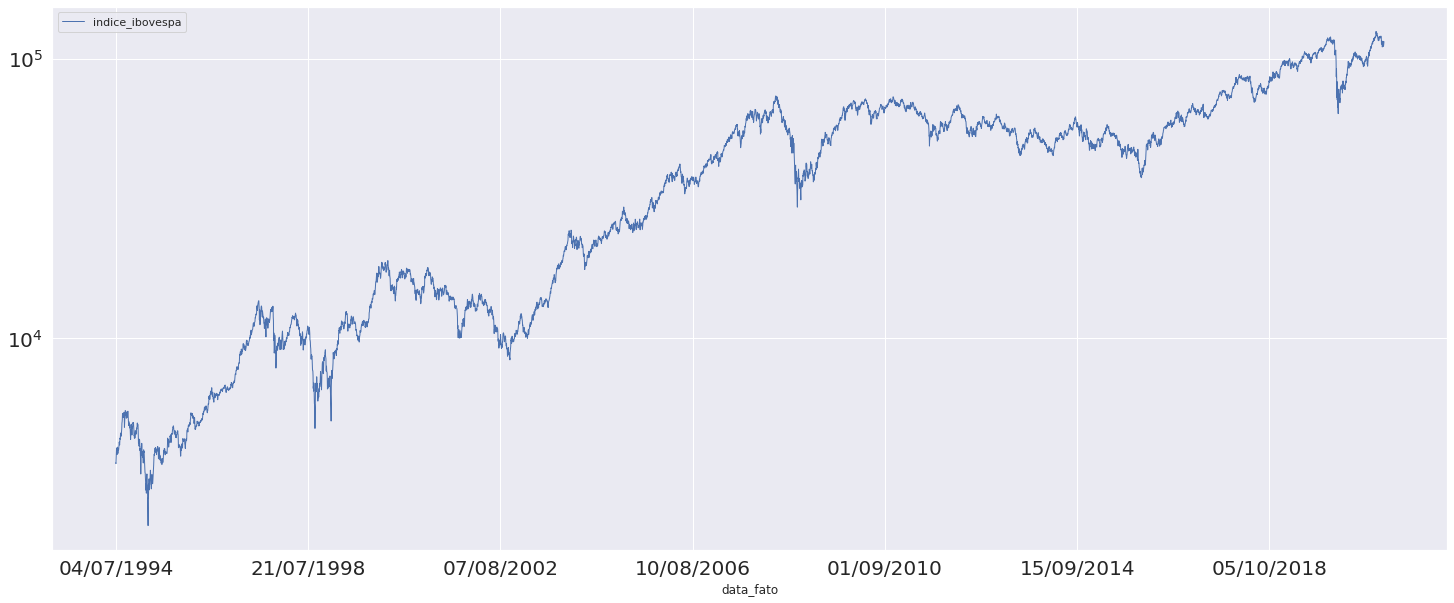

In [40]:
import seaborn as sns
sns.set(rc={'figure.figsize':(25,10)})
dataset.set_index('data_fato').plot(y=['indice_ibovespa'] ,fontsize=20,linewidth=1 , logy=True)

In [41]:
# Restringir periodo 
dataset['data_fato'] = pd.to_datetime(dataset['data_fato'], format='%d/%m/%Y')
periodo = (dataset['data_fato']>'01/02/2010') & (dataset['data_fato'] < '11/03/2021')
dataset_2 = dataset[periodo].copy()
dataset_2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,data_fato,indice_ibovespa
5663,2010-01-04,70045.0
5664,2010-01-05,70239.0
5665,2010-01-06,70729.0
5666,2010-01-07,70451.0
5667,2010-01-08,70262.0
...,...,...
9741,2021-03-05,115202.0
9744,2021-03-08,110612.0
9745,2021-03-09,111331.0
9746,2021-03-10,112776.0


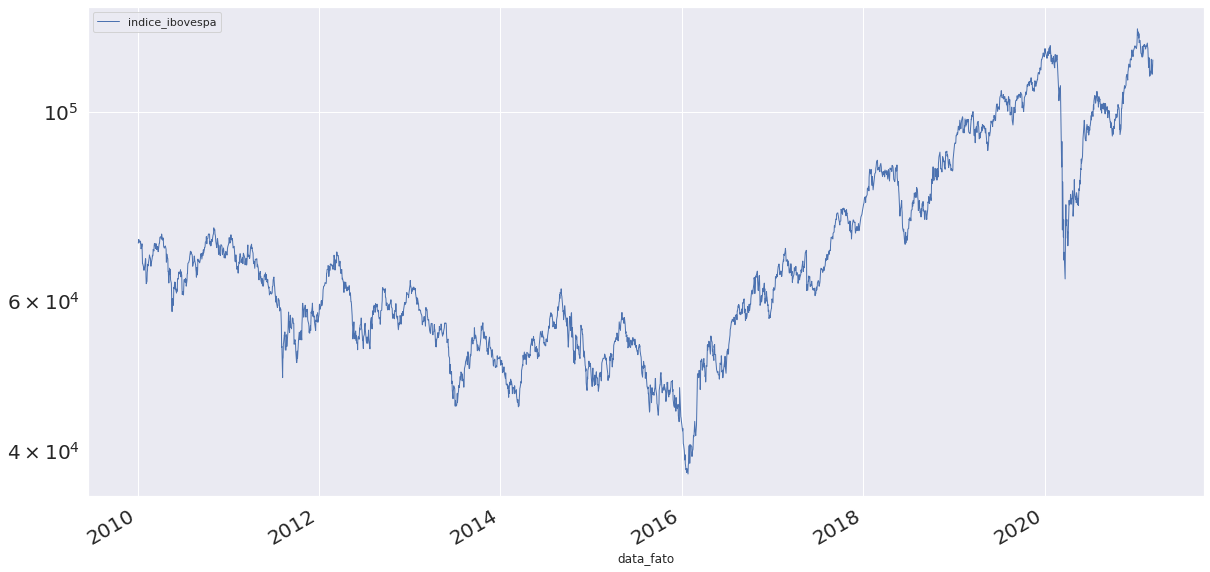

In [42]:
sns.set(rc={'figure.figsize':(20,10)})
dataset_2.set_index('data_fato').sort_index().plot(y=['indice_ibovespa'],logy=True ,fontsize=20,linewidth=1)

In [43]:
dataset_2.corr(method='pearson').style.background_gradient()
# Com base na correlação podemos concluir que...

,indice_ibovespa
indice_ibovespa,1.000000


In [44]:
dataset_2.set_index('data_fato').sort_index()

,indice_ibovespa
data_fato,
2010-01-04,70045.0
2010-01-05,70239.0
2010-01-06,70729.0
2010-01-07,70451.0
2010-01-08,70262.0
...,...
2021-03-05,115202.0
2021-03-08,110612.0
2021-03-09,111331.0


In [45]:
from sklearn.preprocessing import StandardScaler

ibovespa_norm = dataset_2["indice_ibovespa"].values.copy()
ibovespa_norm.shape = (len(ibovespa_norm), 1)

scaler = StandardScaler()
ibovespa_norm = scaler.fit_transform(ibovespa_norm)
dataset_2["indice_ibovespa_norm"] = ibovespa_norm

'''
dow_jones_norm = dataset_2["indice_dow_jones"].values.copy()
dow_jones_norm.shape = (len(dow_jones_norm), 1)

scaler = StandardScaler()
dow_jones_norm = scaler.fit_transform(dow_jones_norm)
dataset_2["indice_dj_norm"] = dow_jones_norm
'''
dataset_2.head(10)

,data_fato,indice_ibovespa,indice_ibovespa_norm
5663,2010-01-04,70045.0,0.068939
5664,2010-01-05,70239.0,0.078982
5665,2010-01-06,70729.0,0.104348
5666,2010-01-07,70451.0,0.089956
5667,2010-01-08,70262.0,0.080172
5670,2010-01-11,70433.0,0.089025
5671,2010-01-12,70076.0,0.070544
5672,2010-01-13,70385.0,0.086540
5673,2010-01-14,69801.0,0.056307
5674,2010-01-15,68978.0,0.013703


In [46]:
df_ibovespa = pd.DataFrame()
window_size = 17
for i in range(0, window_size + 1):
    df_ibovespa["E{}".format(i)] = dataset_2["indice_ibovespa_norm"].shift(-i)
df_ibovespa = df_ibovespa.iloc[:-window_size]
df_ibovespa

,E0,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15,E16,E17
5663,0.068939,0.078982,0.104348,0.089956,0.080172,0.089025,0.070544,0.086540,0.056307,0.013703,0.035600,0.061898,-0.026573,-0.126484,-0.129072,-0.165103,-0.188605,-0.161790
5664,0.078982,0.104348,0.089956,0.080172,0.089025,0.070544,0.086540,0.056307,0.013703,0.035600,0.061898,-0.026573,-0.126484,-0.129072,-0.165103,-0.188605,-0.161790,-0.171418
5665,0.104348,0.089956,0.080172,0.089025,0.070544,0.086540,0.056307,0.013703,0.035600,0.061898,-0.026573,-0.126484,-0.129072,-0.165103,-0.188605,-0.161790,-0.171418,-0.110850
5666,0.089956,0.080172,0.089025,0.070544,0.086540,0.056307,0.013703,0.035600,0.061898,-0.026573,-0.126484,-0.129072,-0.165103,-0.188605,-0.161790,-0.171418,-0.110850,-0.080256
5667,0.080172,0.089025,0.070544,0.086540,0.056307,0.013703,0.035600,0.061898,-0.026573,-0.126484,-0.129072,-0.165103,-0.188605,-0.161790,-0.171418,-0.110850,-0.080256,-0.083051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9716,2.629935,2.625432,2.573716,2.615389,2.609228,2.673409,2.610471,2.590178,2.275431,2.407904,2.430734,2.254102,2.139126,2.154657,2.217037,2.198607,2.276570,2.406610
9717,2.625432,2.573716,2.615389,2.609228,2.673409,2.610471,2.590178,2.275431,2.407904,2.430734,2.254102,2.139126,2.154657,2.217037,2.198607,2.276570,2.406610,2.168996
9718,2.573716,2.615389,2.609228,2.673409,2.610471,2.590178,2.275431,2.407904,2.430734,2.254102,2.139126,2.154657,2.217037,2.198607,2.276570,2.406610,2.168996,2.206217
9719,2.615389,2.609228,2.673409,2.610471,2.590178,2.275431,2.407904,2.430734,2.254102,2.139126,2.154657,2.217037,2.198607,2.276570,2.406610,2.168996,2.206217,2.281022


In [47]:
arr = df_ibovespa.values
arr

array([[ 0.06893871,  0.07898163,  0.10434777, ..., -0.16510277,
        -0.18860528, -0.16178965],
       [ 0.07898163,  0.10434777,  0.08995637, ..., -0.18860528,
        -0.16178965, -0.17141843],
       [ 0.10434777,  0.08995637,  0.08017228, ..., -0.16178965,
        -0.17141843, -0.11085029],
       ...,
       [ 2.57371576,  2.61538871,  2.60922836, ...,  2.40660984,
         2.16899639,  2.20621732],
       [ 2.61538871,  2.60922836,  2.67340936, ...,  2.16899639,
         2.20621732,  2.28102155],
       [ 2.60922836,  2.67340936,  2.61047079, ...,  2.20621732,
         2.28102155,  2.39532449]])

In [48]:
X = arr[:, :-1]
target = arr[:, -1]
print(X)
print(target)

[[ 0.06893871  0.07898163  0.10434777 ... -0.1290725  -0.16510277
  -0.18860528]
 [ 0.07898163  0.10434777  0.08995637 ... -0.16510277 -0.18860528
  -0.16178965]
 [ 0.10434777  0.08995637  0.08017228 ... -0.18860528 -0.16178965
  -0.17141843]
 ...
 [ 2.57371576  2.61538871  2.60922836 ...  2.27656954  2.40660984
   2.16899639]
 [ 2.61538871  2.60922836  2.67340936 ...  2.40660984  2.16899639
   2.20621732]
 [ 2.60922836  2.67340936  2.61047079 ...  2.16899639  2.20621732
   2.28102155]]
[-0.16178965 -0.17141843 -0.11085029 ...  2.20621732  2.28102155
  2.39532449]


In [49]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

mlp = MLPRegressor(hidden_layer_sizes=(50,100), activation="logistic", max_iter=1000, solver="sgd", verbose=True)
full_predict = cross_val_predict(mlp, X, target, cv=10)
print("Mean Squared Error: %s" %(metrics.mean_squared_error(target, full_predict)))

Iteration 1, loss = 0.60406378
Iteration 2, loss = 0.55911132
Iteration 3, loss = 0.54912951
Iteration 4, loss = 0.54329712
Iteration 5, loss = 0.53760098
Iteration 6, loss = 0.53174771
Iteration 7, loss = 0.52583497
Iteration 8, loss = 0.52042745
Iteration 9, loss = 0.51410704
Iteration 10, loss = 0.50802872
Iteration 11, loss = 0.50206047
Iteration 12, loss = 0.49606737
Iteration 13, loss = 0.48855482
Iteration 14, loss = 0.48165142
Iteration 15, loss = 0.47436465
Iteration 16, loss = 0.46667301
Iteration 17, loss = 0.45892440
Iteration 18, loss = 0.45035085
Iteration 19, loss = 0.44173199
Iteration 20, loss = 0.43271081
Iteration 21, loss = 0.42310803
Iteration 22, loss = 0.41306547
Iteration 23, loss = 0.40250374
Iteration 24, loss = 0.39148323
Iteration 25, loss = 0.38027555
Iteration 26, loss = 0.36781593
Iteration 27, loss = 0.35563460
Iteration 28, loss = 0.34262414
Iteration 29, loss = 0.32909613
Iteration 30, loss = 0.31529470
Iteration 31, loss = 0.30097881
Iteration 32, los

In [50]:
print(len(full_predict))
print(len(dataset_2["indice_ibovespa_norm"]))

2745
2762


In [51]:
import numpy as np

values_to_add = list()
for i in range(0, window_size):
    values_to_add.append(float("NaN"))
full_predict = np.insert(full_predict, 0, values_to_add)
full_predict.shape = (len(full_predict), 1)
full_predict.shape

(2762, 1)

In [52]:
dataset_2["predict_ibovespa"] = full_predict
dataset_2

,data_fato,indice_ibovespa,indice_ibovespa_norm,predict_ibovespa
5663,2010-01-04,70045.0,0.068939,NaN
5664,2010-01-05,70239.0,0.078982,NaN
5665,2010-01-06,70729.0,0.104348,NaN
5666,2010-01-07,70451.0,0.089956,NaN
5667,2010-01-08,70262.0,0.080172,NaN
...,...,...,...,...
9741,2021-03-05,115202.0,2.406610,1.846845
9744,2021-03-08,110612.0,2.168996,1.842452
9745,2021-03-09,111331.0,2.206217,1.837238
9746,2021-03-10,112776.0,2.281022,1.827507


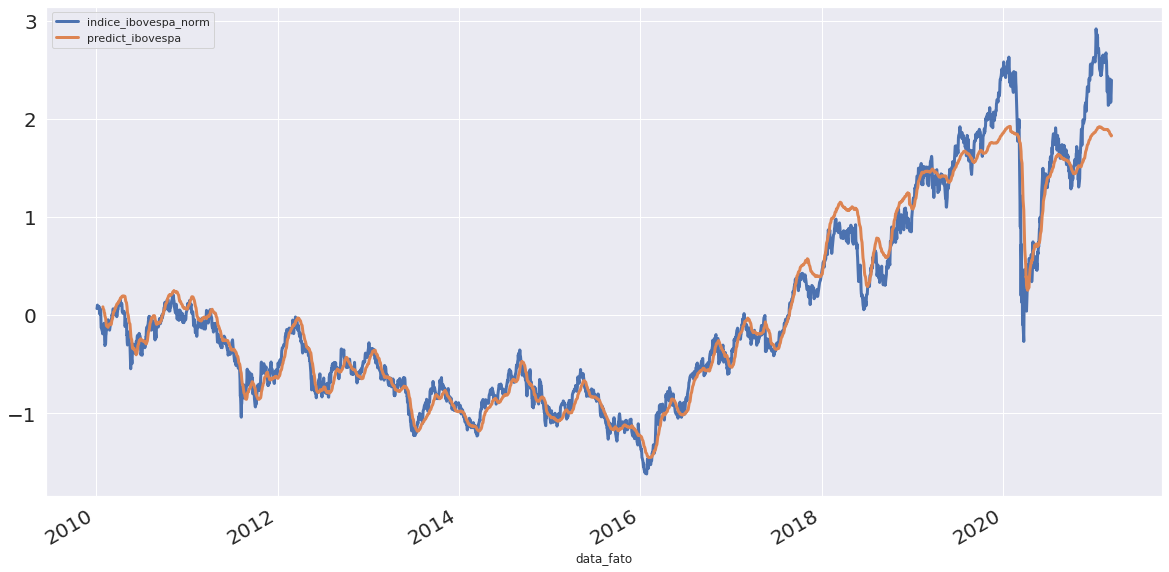

In [53]:
dataset_2.set_index('data_fato').plot(y=["indice_ibovespa_norm", "predict_ibovespa"] ,fontsize=20,linewidth=3)

In [54]:
'''
# Indice Dow Jones
df_jones = pd.DataFrame()
window_size = 17
for i in range(0, window_size + 1):
    df_jones["E{}".format(i)] = dataset_2["indice_dj_norm"].shift(-i)
df_jones = df_jones.iloc[:-window_size]
df_jones

arr_dj = df_jones.values
arr_dj

X_dj = arr_dj[:, :-1]
target_dj = arr_dj[:, -1]
print(X_dj)
print(target_dj)

mlp = MLPRegressor(hidden_layer_sizes=(50,100), activation="logistic", max_iter=1000, solver="sgd", verbose=True)
full_predict_dj = cross_val_predict(mlp, X_dj, target_dj, cv=10)
print("Mean Squared Error: %s" %(metrics.mean_squared_error(target_dj, full_predict_dj)))

print(len(full_predict_dj))
print(len(dataset_2["indice_dj_norm"]))

values_to_add_dj = list()
for i in range(0, window_size):
    values_to_add_dj.append(float("NaN"))
full_predict_dj = np.insert(full_predict_dj, 0, values_to_add_dj)
full_predict_dj.shape = (len(full_predict_dj), 1)
full_predict_dj.shape

dataset_2["predict_dj"] = full_predict_dj
dataset_2

dataset_2.set_index('data_fato').plot(y=["indice_dj_norm", "predict_dj"] ,fontsize=20,linewidth=3)

'''



'\n# Indice Dow Jones\ndf_jones = pd.DataFrame()\nwindow_size = 17\nfor i in range(0, window_size + 1):\n    df_jones["E{}".format(i)] = dataset_2["indice_dj_norm"].shift(-i)\ndf_jones = df_jones.iloc[:-window_size]\ndf_jones\n\narr_dj = df_jones.values\narr_dj\n\nX_dj = arr_dj[:, :-1]\ntarget_dj = arr_dj[:, -1]\nprint(X_dj)\nprint(target_dj)\n\nmlp = MLPRegressor(hidden_layer_sizes=(50,100), activation="logistic", max_iter=1000, solver="sgd", verbose=True)\nfull_predict_dj = cross_val_predict(mlp, X_dj, target_dj, cv=10)\nprint("Mean Squared Error: %s" %(metrics.mean_squared_error(target_dj, full_predict_dj)))\n\nprint(len(full_predict_dj))\nprint(len(dataset_2["indice_dj_norm"]))\n\nvalues_to_add_dj = list()\nfor i in range(0, window_size):\n    values_to_add_dj.append(float("NaN"))\nfull_predict_dj = np.insert(full_predict_dj, 0, values_to_add_dj)\nfull_predict_dj.shape = (len(full_predict_dj), 1)\nfull_predict_dj.shape\n\ndataset_2["predict_dj"] = full_predict_dj\ndataset_2\n\ndata